In [1]:
#/default_exp app

In [2]:
%pip install fastai

  Using cached fastai-2.7.14-py3-none-any.whl.metadata (9.1 kB)
  Using cached fastdownload-0.0.7-py3-none-any.whl.metadata (5.5 kB)
  Using cached fastcore-1.5.29-py3-none-any.whl.metadata (3.5 kB)
  Using cached fastprogress-1.0.3-py3-none-any.whl.metadata (5.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.9/217.9 kB 8.7 MB/s eta 0:00:00
  Using cached typer-0.9.0-py3-none-any.whl.metadata (14 kB)
  Using cached pydantic-2.6.3-py3-none-any.whl.metadata (84 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 9.3 MB/s eta 0:00:00
  Using cached sympy-1.12-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.2.1-py3-none-any.whl.metadata (5.2 kB)
  Using cached fsspec-2024.2.0-py3-none-any.whl.metadata (6.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 20.1 MB/s eta 0:00:00
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.3.0-py3-none-any.whl.metadata (13 kB)
  Using cached annotated_types-0.6.0-py3-n

In [3]:
%pip install gradio

  Using cached gradio-4.20.1-py3-none-any.whl.metadata (15 kB)
  Using cached aiofiles-23.2.1-py3-none-any.whl.metadata (9.7 kB)
  Using cached fastapi-0.110.0-py3-none-any.whl.metadata (25 kB)
  Preparing metadata (setup.py) ... done
  Using cached gradio_client-0.11.0-py3-none-any.whl.metadata (7.1 kB)
  Using cached importlib_resources-6.1.3-py3-none-any.whl.metadata (3.9 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached python_multipart-0.0.9-py3-none-any.whl.metadata (2.5 kB)
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl.metadata (9.7 kB)
  Using cached tomlkit-0.12.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached uvicorn-0.27.1-py3-none-any.whl.metadata (6.3 kB)
  Using cached jsonschema-4.21.1-py3-none-any.whl.metadata (7.8 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached starlette-0.36.3-py3-none-any.whl.m

In [1]:
#/export
from fastai.vision.all import *
import gradio as gr
from fastbook import *
def is_cat(x): return x[0].isupper()

In [2]:
urls = search_images_ddg('dog photos', max_images=1)
dest = Path('dog.jpg')
if not dest.exists(): download_url(urls[0], dest, show_progress=False)

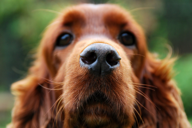

In [3]:
im = PILImage.create('dog.jpg')
im.thumbnail((192,192))
im

In [4]:
#/export
learn = load_learner('model.pkl')

In [5]:
learn.predict(im)

('False', tensor(0), tensor([1.0000e+00, 5.9419e-08]))

In [4]:
#/export
categories = ('Dog','Cat')

def classify_image(img):
  pred,idx,prob = learn.predict(img)
  return dict(zip(categories,map(float,prob)))

In [7]:
classify_image(im)

{'Dog': 1.0, 'Cat': 5.941916825236149e-08}

In [5]:
#/export
image = gr.Image()
label = gr.Label()
examples = ['dog.jpg', 'cat.jpg', 'dunno.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "/Users/imsang-yeob/miniconda3/lib/python3.12/site-packages/gradio/queueing.py", line 501, in call_prediction
    output = await route_utils.call_process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/imsang-yeob/miniconda3/lib/python3.12/site-packages/gradio/route_utils.py", line 252, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/imsang-yeob/miniconda3/lib/python3.12/site-packages/gradio/blocks.py", line 1664, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/imsang-yeob/miniconda3/lib/python3.12/site-packages/gradio/blocks.py", line 1205, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/imsang-yeob/miniconda3/lib/python3.12/site-packages/anyio/to_thread.py", line 56, in run_sync
    return await get

In [9]:
m = learn.model

In [6]:
import nbdev
nbdev.export.nb_export('app.ipynb', './')